In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as st

In [147]:
path = r"C:\Users\harsh\Downloads\2020_Yellow_Taxi_Trip_Data(1).csv"
dfs = []
for chunk in pd.read_csv(path, chunksize=300000):
    part = chunk[ chunk['trip_distance'] < 10 ]
    dfs.append(part)

df = pd.concat(dfs, ignore_index=True)


C:\Users\harsh\AppData\Local\Temp\ipykernel_18268\2278739259.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(path, chunksize=300000):
C:\Users\harsh\AppData\Local\Temp\ipykernel_18268\2278739259.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(path, chunksize=300000):
C:\Users\harsh\AppData\Local\Temp\ipykernel_18268\2278739259.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(path, chunksize=300000):
C:\Users\harsh\AppData\Local\Temp\ipykernel_18268\2278739259.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(path, chunksize=300000):
C:\Users\harsh\AppData\Local\Temp\ipykernel_18268\2278739259.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype

In [148]:
df = dfs[0]

In [149]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df["tpep_pickup_datetime"] = pd.to_datetime(df['tpep_pickup_datetime'])
df["Duratiom_min"] = df['tpep_dropoff_datetime']-df["tpep_pickup_datetime"]
df["Duratiom_min"]=df["Duratiom_min"].dt.total_seconds()/60
df.info()


C:\Users\harsh\AppData\Local\Temp\ipykernel_18268\90646236.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
C:\Users\harsh\AppData\Local\Temp\ipykernel_18268\90646236.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["tpep_pickup_datetime"] = pd.to_datetime(df['tpep_pickup_datetime'])


<class 'pandas.core.frame.DataFrame'>
Index: 277317 entries, 0 to 299999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               277037 non-null  float64       
 1   tpep_pickup_datetime   277317 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  277317 non-null  datetime64[ns]
 3   passenger_count        277037 non-null  float64       
 4   trip_distance          277317 non-null  float64       
 5   RatecodeID             277037 non-null  float64       
 6   store_and_fwd_flag     277037 non-null  object        
 7   PULocationID           277317 non-null  int64         
 8   DOLocationID           277317 non-null  int64         
 9   payment_type           277037 non-null  float64       
 10  fare_amount            277317 non-null  float64       
 11  extra                  277317 non-null  float64       
 12  mta_tax                277317 non-null  float64  

In [150]:
df = df[["passenger_count","payment_type","fare_amount","trip_distance","Duratiom_min"]]
df.dropna(inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_18268\628275464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [151]:
df["passenger_count"]= df["passenger_count"].astype("int64")
df["payment_type"]= df["payment_type"].astype("int64")
df['payment_type'].value_counts(normalize = True)


C:\Users\harsh\AppData\Local\Temp\ipykernel_18268\697321233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["passenger_count"]= df["passenger_count"].astype("int64")
C:\Users\harsh\AppData\Local\Temp\ipykernel_18268\697321233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["payment_type"]= df["payment_type"].astype("int64")


payment_type
1    0.640416
2    0.350000
3    0.005970
4    0.003613
Name: proportion, dtype: float64

In [152]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

C:\Users\harsh\AppData\Local\Temp\ipykernel_18268\2101504858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


0

In [179]:
#df = df[df['payment_type']<3]
df = df[(df['passenger_count']>0)&(df['passenger_count']<7)]
df = df[df['Duratiom_min']>0]
df = df[df['trip_distance']>0]
df = df[df['fare_amount']>0]


In [154]:
df.describe()

,passenger_count,payment_type,fare_amount,trip_distance,Duratiom_min
count,229271.000000,229271.000000,229271.000000,229271.000000,229271.000000
mean,1.737245,1.371931,11.268805,2.522414,16.174386
std,1.268800,0.483321,7.110852,2.049345,77.853588
min,1.000000,1.000000,0.010000,0.010000,0.016667
25%,1.000000,1.000000,6.500000,1.100000,6.483333
50%,1.000000,1.000000,9.500000,1.830000,10.466667
75%,2.000000,2.000000,14.000000,3.220000,15.783333
max,6.000000,2.000000,400.000000,9.990000,1439.600000


In [155]:
df['payment_type'].replace([1,2],['Card','Cash'],inplace = True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_18268\2638728497.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['payment_type'].replace([1,2],['Card','Cash'],inplace = True)


In [156]:
df.describe()


,passenger_count,fare_amount,trip_distance,Duratiom_min
count,229271.000000,229271.000000,229271.000000,229271.000000
mean,1.737245,11.268805,2.522414,16.174386
std,1.268800,7.110852,2.049345,77.853588
min,1.000000,0.010000,0.010000,0.016667
25%,1.000000,6.500000,1.100000,6.483333
50%,1.000000,9.500000,1.830000,10.466667
75%,2.000000,14.000000,3.220000,15.783333
max,6.000000,400.000000,9.990000,1439.600000


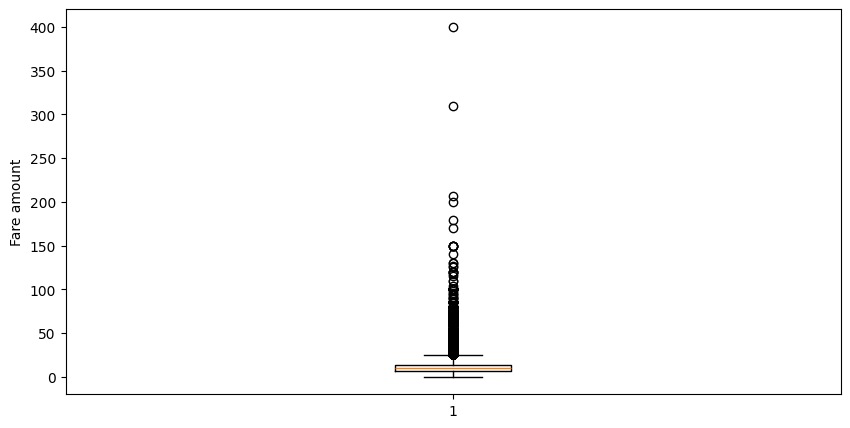

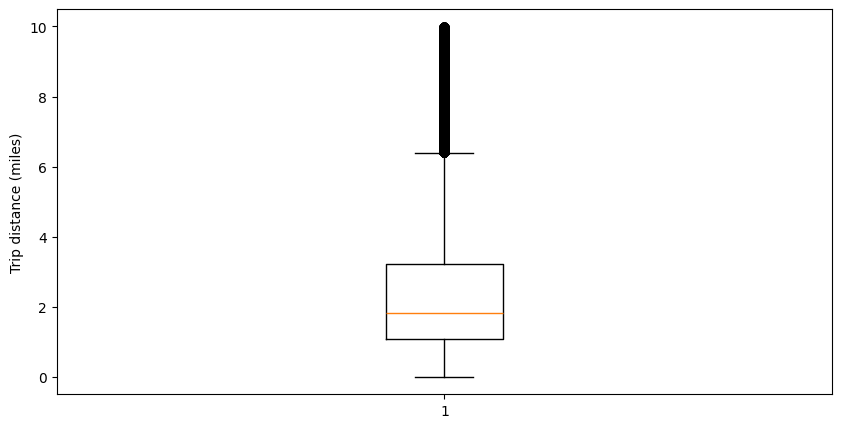

In [157]:
plt.figure(figsize=(10,5))
plt.boxplot(df["fare_amount"])
plt.xlabel("")
plt.ylabel("Fare amount")
plt.show()

plt.figure(figsize=(10,5))
plt.boxplot(df["trip_distance"])
plt.xlabel("")
plt.ylabel("Trip distance (miles)")
plt.show()

In [158]:
def remove_outliers(df, col):
    q1, q3 = df[col].quantile([0.25, 0.75])
    IQR = q3 - q1
    low, high = q1 - 1.5*IQR, q3 + 1.5*IQR
    return df[df[col].between(low, high)]


In [159]:
cols = ['passenger_count', 'fare_amount', 'trip_distance',
       'Duratiom_min']
for col in cols:
    df = remove_outliers(df,col)

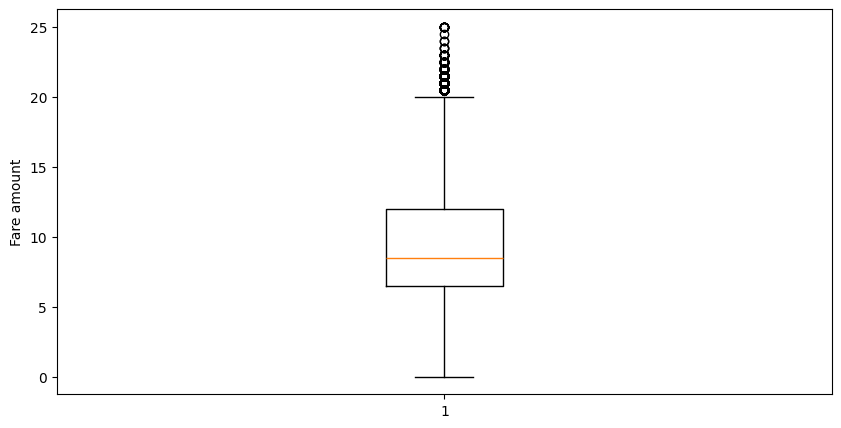

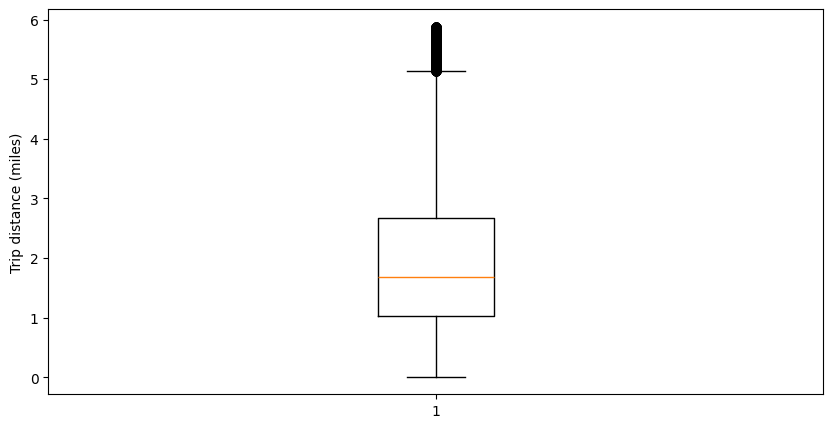

STATS**************************************************STATS


,passenger_count,fare_amount,trip_distance,Duratiom_min
count,181245.000000,181245.00000,181245.000000,181245.000000
mean,1.354161,9.47602,1.993060,10.410620
std,0.604446,4.00610,1.261544,5.497337
min,1.000000,0.01000,0.010000,0.016667
25%,1.000000,6.50000,1.030000,6.116667
50%,1.000000,8.50000,1.680000,9.600000
75%,2.000000,12.00000,2.670000,13.950000
max,3.000000,25.00000,5.880000,26.466667


In [160]:
plt.figure(figsize=(10,5))
plt.boxplot(df["fare_amount"])
plt.xlabel("")
plt.ylabel("Fare amount")
plt.show()

plt.figure(figsize=(10,5))
plt.boxplot(df["trip_distance"])
plt.xlabel("")
plt.ylabel("Trip distance (miles)")
plt.show()
print(f"STATS{"*"*50}STATS")
df.describe()

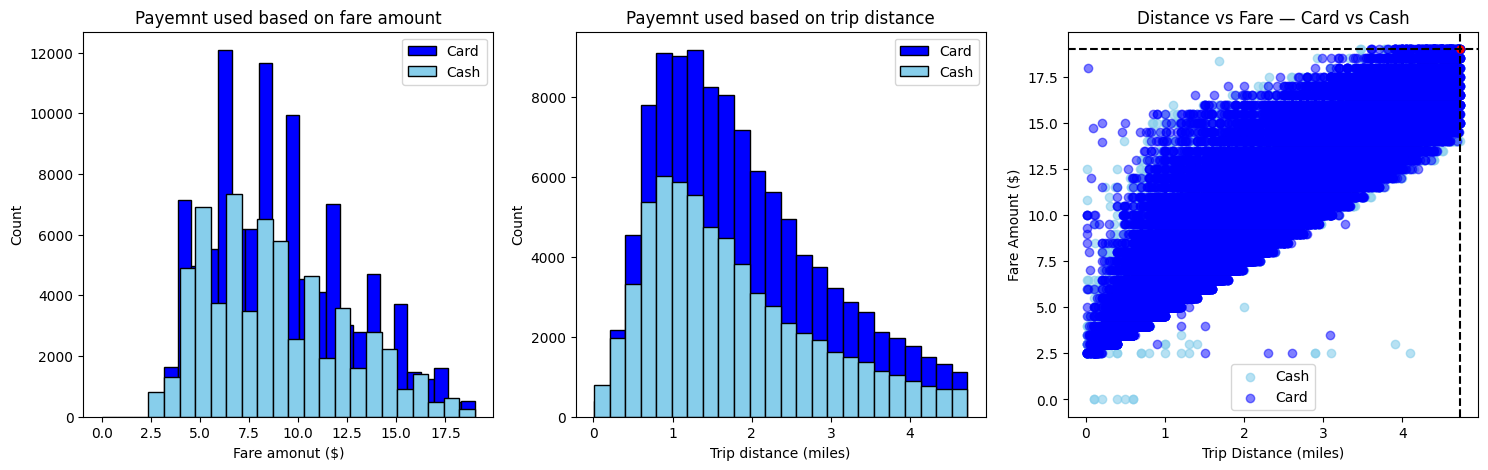

In [382]:

card = df[df["payment_type"]=="Card"]
cash = df[df["payment_type"]=="Cash"]

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.hist(df[df["payment_type"]=="Card"]['fare_amount'],histtype="barstacked",bins=24,edgecolor='black',label="Card",color="blue")
plt.hist(df[df["payment_type"]=="Cash"]['fare_amount'],histtype="barstacked",bins=24,edgecolor='black',label="Cash",color="skyblue")
plt.xlabel("Fare amonut ($)")
plt.legend()
plt.ylabel("Count")
plt.title("Payemnt used based on fare amount")

plt.subplot(1,3,2)
plt.hist(df[df["payment_type"]=="Card"]['trip_distance'],histtype="barstacked",bins=24,edgecolor='black',label="Card",color="blue")
plt.hist(df[df["payment_type"]=="Cash"]['trip_distance'],histtype="barstacked",bins=24,edgecolor='black',label="Cash",color="skyblue")
plt.xlabel("Trip distance (miles)")
plt.legend()
plt.ylabel("Count")
plt.title("Payemnt used based on trip distance")

plt.subplot(1,3,3)
plt.scatter(cash["trip_distance"], cash["fare_amount"], label="Cash", alpha=0.6,c="skyblue")
plt.scatter(card["trip_distance"], card["fare_amount"], label="Card", alpha=0.5,c="blue")
plt.scatter(df['trip_distance'].max(),df['fare_amount'].max(),color='red',s=25)
plt.axhline(df['fare_amount'].max(),linestyle="--",color="black")
plt.axvline(df['trip_distance'].max(),linestyle="--",color="black")

plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Distance vs Fare — Card vs Cash")
plt.legend()
plt.show()


In [181]:
print(df.groupby("payment_type").agg({"fare_amount":["std","mean"],"trip_distance":["std","mean"]}))

             fare_amount           trip_distance          
                     std      mean           std      mean
payment_type                                              
Card            3.983419  9.581128      1.248901  2.037271
Cash            4.038114  9.297379      1.279254  1.917918


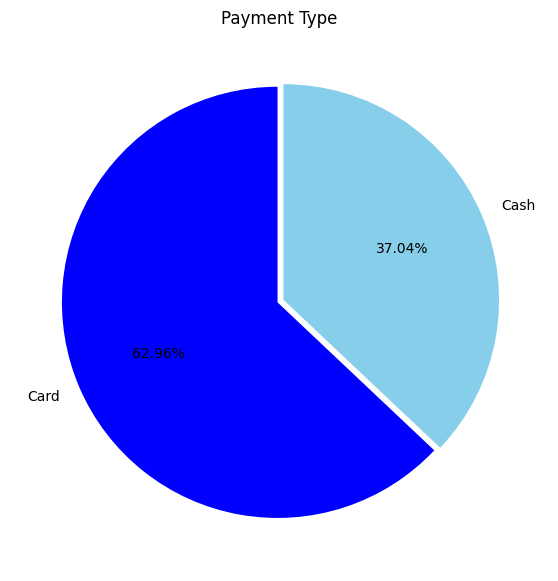

In [182]:

counts = df["payment_type"].value_counts()
labels = counts.index    
values = counts.values    

plt.figure(figsize=(7,7))
plt.pie(values, labels=labels, autopct="%1.2f%%", startangle=90,colors = ["blue","skyblue"],shadow=False,explode=[0.01,0.02])
plt.title("Payment Type")
plt.show()


In [183]:
passenger_count_df = df.groupby(['payment_type',"passenger_count"])[["passenger_count"]].count()
passenger_count_df.rename(columns={"passenger_count":"count"},inplace=True)
passenger_count_df.reset_index(inplace=True)

In [ ]:
passenger_count_df['percentage'] = (passenger_count_df['count']/passenger_count_df["count"].sum())*100 
passenger_count_df

,payment_type,passenger_count,count,percentage
0,Card,1,81838,45.153246
1,Card,2,24836,13.702999
2,Card,3,7433,4.101079
3,Cash,1,47598,26.261690
4,Cash,2,14592,8.050981
5,Cash,3,4948,2.730006


In [230]:
barh_df = pd.DataFrame(columns=["payment_type",1,2,3])
barh_df["payment_type"] = ['Card',"Cash"]
barh_df.iloc[0,1:] = passenger_count_df.iloc[0:3, 3].values
barh_df.iloc[1,1:] = passenger_count_df.iloc[3:6, 3].values
barh_df


,payment_type,1,2,3
0,Card,45.153246,13.702999,4.101079
1,Cash,26.26169,8.050981,2.730006


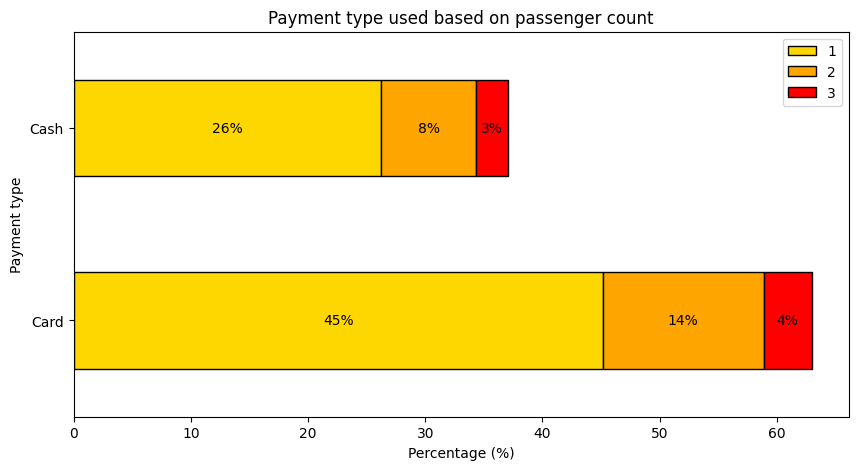

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
barh_df.plot(x='payment_type',kind="barh",stacked=True,color=['gold',"orange","red"],edgecolor='black',ax=ax)
plt.ylabel("Payment type")
plt.xlabel("Percentage (%)")
plt.title("Payment type used based on passenger count")

for i in ax.patches:
    width = i.get_width()
    height = i.get_height()
    x,y = i.get_xy()
    ax.text(x+width/2,y+height/2,"{:.0f}%".format(width),ha = 'center',va="center")

<Figure size 1200x500 with 0 Axes>

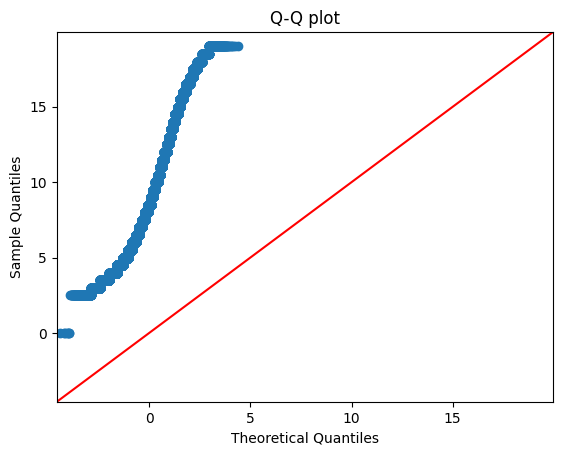

In [376]:
plt.figure(figsize=(12,5))
sm.qqplot(df['fare_amount'],line='45')
plt.title("Q-Q plot")
plt.show()

**Null hypothesis**: There is no significant differnce between payment method used

**Alternative hypothesis**: There is significant differnce between payment method used


In [273]:
#Performing t-test
import scipy.stats as st
cash_df = df[df["payment_type"]=="Cash"]['fare_amount']
card_df = df[df["payment_type"]=="Card"]['fare_amount']

t_stats,p_val = st.ttest_ind(a = card_df , b=cash_df , equal_var=False)
print(f"T value: {t_stats}\nP-Value: {p_val}")

#Ho: Rejeceted , H1: Accepted



T value: 14.51906957511271
P-Value: 9.943777082190778e-48


c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


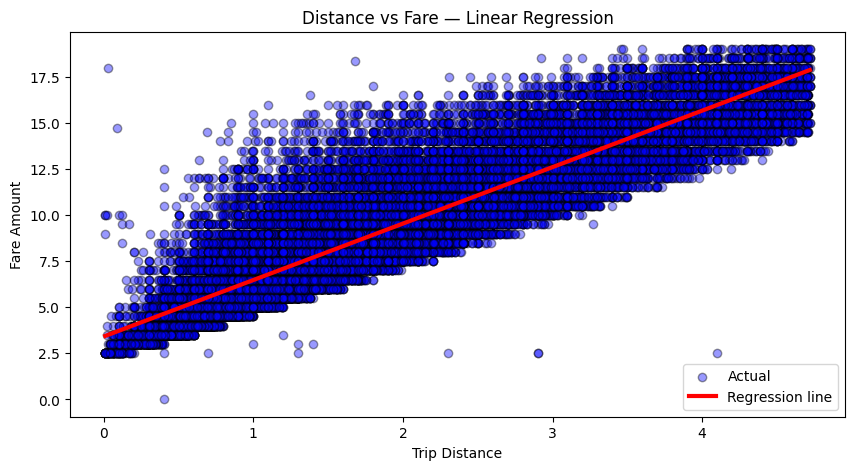

| Important Metrices   |   Values |
|----------------------|----------|
| Slope                | 3.06315  |
| Intercept            | 3.41367  |
| R2 score             | 0.834723 |
| MAE                  | 1.06085  |
| RMSE                 | 1.43324  |


In [352]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tabulate import tabulate

for col in ["trip_distance","fare_amount"]:
    df = remove_outliers(df,col)
    
    
x = df[["trip_distance"]]      
y = df["fare_amount"]          



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


lr = LinearRegression()
lr.fit(x_train, y_train)


y_pred = lr.predict(x_test)

x_line = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_line = lr.predict(x_line)


plt.figure(figsize=(10,5))
plt.scatter(x_test, y_test, color="blue", edgecolor="black", label="Actual",alpha=0.4)
plt.plot(x_line, y_line, color="red", linewidth=3, label="Regression line")

plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Distance vs Fare — Linear Regression")
plt.legend()
plt.show()

slope = lr.coef_[0]
intercept = lr.intercept_
# print("Slope:", lr.coef_[0])
# print("Intercept:", lr.intercept_)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f"\nR2 score: {r2}\nMAE: {mae}\nRMSE: {rmse}")

data = [
    ["Slope",slope],
    ["Intercept",intercept],
    ["R2 score",r2],
    ["MAE",mae],
    ['RMSE',rmse]

]
print(tabulate(data,headers=["Important Metrices","Values"],tablefmt='github'))


In [353]:
def pred_price(distance):
    price = slope*distance+intercept
    print(f"{price:.2f}$")

In [354]:
price = pred_price(150)


462.89$


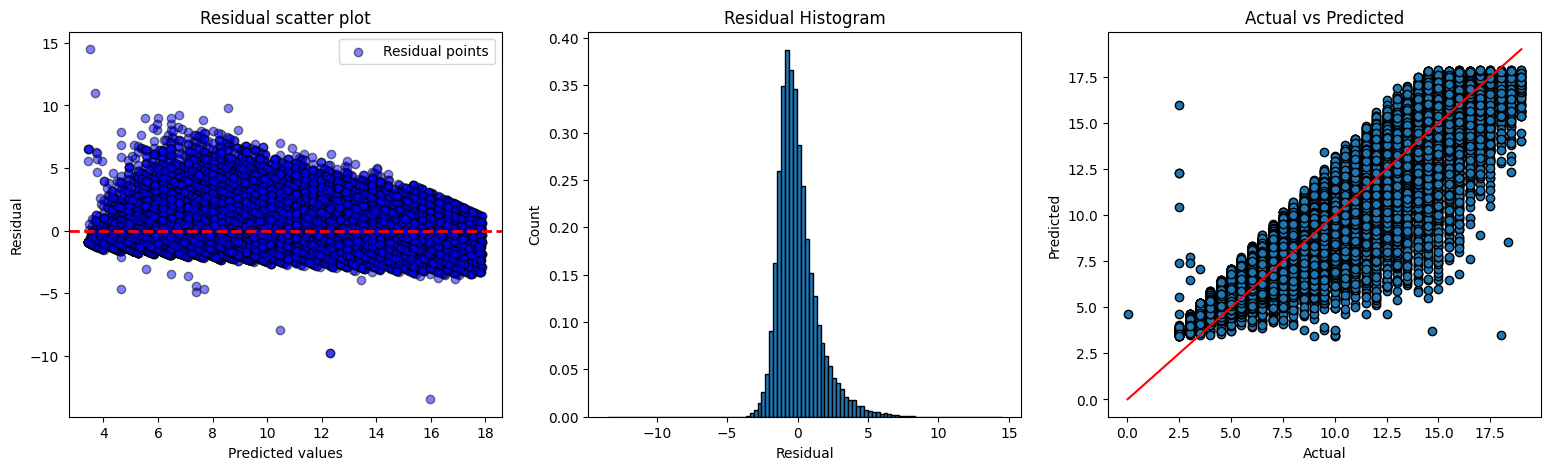

In [364]:
plt.figure(figsize=(19,5))
plt.subplot(1,3,1)
residual = y_test-y_pred
plt.scatter(y_pred,residual,edgecolors='black',color='blue',alpha=0.5,label = "Residual points")
plt.xlabel("Predicted values")
plt.ylabel("Residual")
plt.title("Residual scatter plot")
plt.axhline(0,color='red',linestyle="--",linewidth=2)
plt.legend()

plt.subplot(1,3,2)
plt.hist(residual, bins=100, edgecolor="black",density=True)
plt.xlabel("Residual")
plt.ylabel("Count")
plt.title("Residual Histogram")


plt.subplot(1,3,3)
plt.scatter(y_test, y_pred, edgecolor="black")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color="red")
plt.show()



Random Forest Results:
R2: 0.840033909547995
MAE: 1.0362238932526386
RMSE: 1.41001818472351


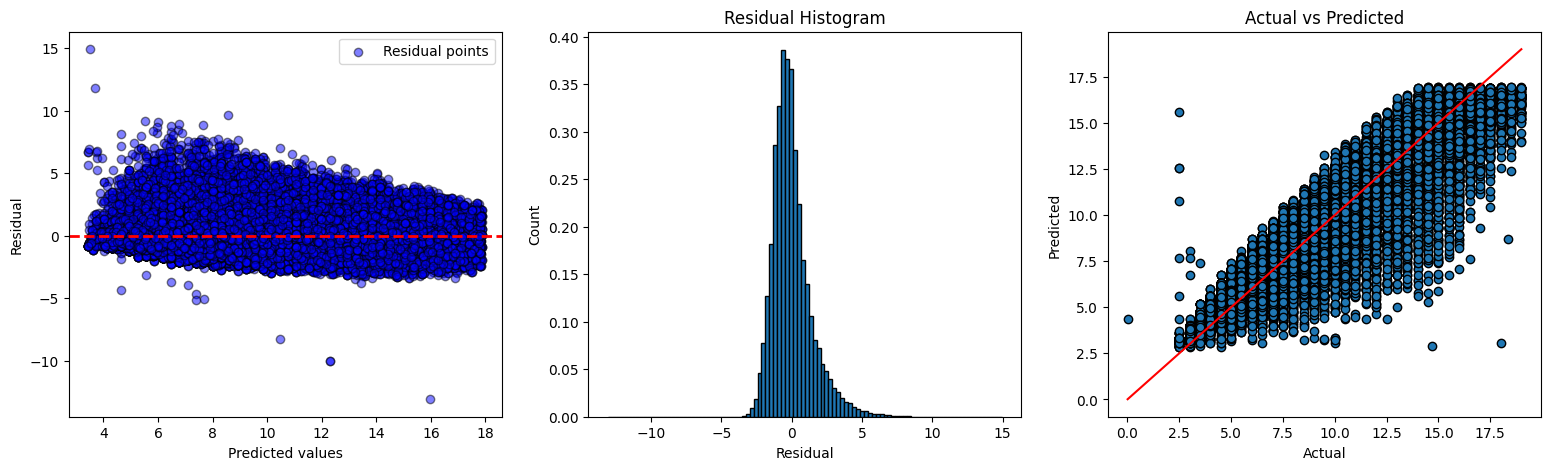

In [365]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

r2 = r2_score(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Results:")
print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

plt.figure(figsize=(19,5))
plt.subplot(1,3,1)
residual = y_test-y_pred_rf
plt.scatter(y_pred,residual,edgecolors='black',color='blue',alpha=0.5,label = "Residual points")
plt.xlabel("Predicted values")
plt.ylabel("Residual")
plt.axhline(0,color='red',linestyle="--",linewidth=2)
plt.legend()


plt.subplot(1,3,2)
plt.hist(residual, bins=100, edgecolor="black",density=True)
plt.xlabel("Residual")
plt.ylabel("Count")
plt.title("Residual Histogram")


plt.subplot(1,3,3)
plt.scatter(y_test, y_pred_rf, edgecolor="black")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color="red")
plt.show()




Gradient Boosting Results:
R2: 0.8401478416597835
MAE: 1.036206131799937
RMSE: 1.4095159690247474


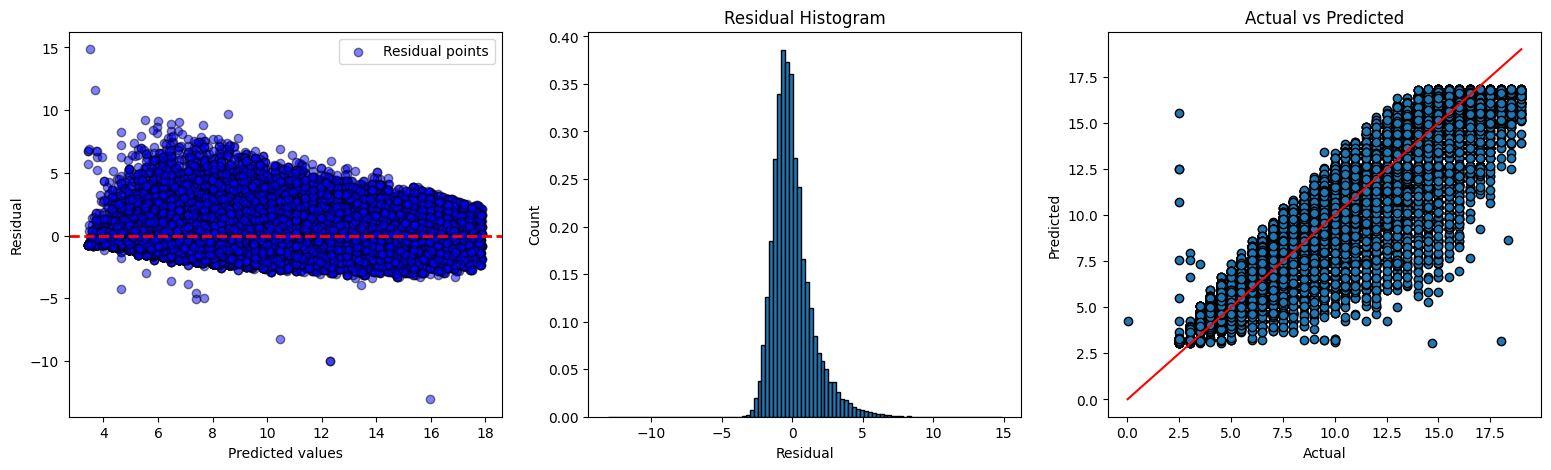

In [366]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(x_train, y_train)

y_pred_gbr = gbr.predict(x_test)

r2 = r2_score(y_test, y_pred_gbr)
mae = mean_absolute_error(y_test, y_pred_gbr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))

print("Gradient Boosting Results:")
print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)
residual = y_test-y_pred_gbr

plt.figure(figsize=(19,5))
plt.subplot(1,3,1)
plt.scatter(y_pred,residual,edgecolors='black',color='blue',alpha=0.5,label = "Residual points")
plt.xlabel("Predicted values")
plt.ylabel("Residual")
plt.axhline(0,color='red',linestyle="--",linewidth=2)
plt.legend()


plt.subplot(1,3,2)
plt.hist(residual, bins=100, edgecolor="black",density=True)
plt.xlabel("Residual")
plt.ylabel("Count")
plt.title("Residual Histogram")


plt.subplot(1,3,3)
plt.scatter(y_test, y_pred_gbr, edgecolor="black")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color="red")
plt.show()




In [361]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from tabulate import tabulate

# --- RANDOM FOREST ---
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))


# --- GRADIENT BOOSTING ---
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(x_train, y_train)
y_pred_gbr = gbr.predict(x_test)

gbr_r2 = r2_score(y_test, y_pred_gbr)
gbr_mae = mean_absolute_error(y_test, y_pred_gbr)
gbr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))


# --- TABLE ---
data = [
    ["Random Forest", rf_r2, rf_mae, rf_rmse],
    ["Gradient Boosting", gbr_r2, gbr_mae, gbr_rmse],
]

print(tabulate(data, 
               headers=["Model", "R2", "MAE", "RMSE"], 
               tablefmt="github"))


| Model             |       R2 |     MAE |    RMSE |
|-------------------|----------|---------|---------|
| Random Forest     | 0.840034 | 1.03622 | 1.41002 |
| Gradient Boosting | 0.840148 | 1.03621 | 1.40952 |
